# EDA and Prediction of Indian Housing price dataset

# Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as house price prediction . I will demonstrate this by using supervised ML technique in the simplest form.

Source: Kaggle
Url: https://www.kaggle.com/himanshuntt/indian-housing-price

### Importing PyForest to avoid the hassel of importing all the libraries. Dataset is being imported

In [1]:
!pip install PyForest

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)'))) - skipping


In [1]:
from pyforest import *

In [2]:
df=pd.read_csv('houseprice.csv')

<IPython.core.display.Javascript object>

### Data spread and diversites inspection

In [3]:
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [4]:
df.tail()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
1042,1.802,2.0,4,0.97,56,1,10.7695
1043,3.239,3.5,4,2.50,1,1,23.6737
1044,1.440,2.0,2,0.61,66,1,15.4829
1045,2.030,2.5,3,1.00,3,1,17.9492
1046,2.097,2.5,3,1.93,10,1,18.9108


Observation: Most of the features are are straight forward to understand and the spread of the data in the top and bottom of dataset seems to be distributed evenly

### Finding the shape and data types in dataset

In [5]:
df.shape

(1047, 7)

Observation: data set consists of 1047 rows/observation and 7 attributes/features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
Living Area    1047 non-null float64
Bathrooms      1047 non-null float64
Bedrooms       1047 non-null int64
Lot Size       1047 non-null float64
Age            1047 non-null int64
Fireplace      1047 non-null int64
Price          1047 non-null float64
dtypes: float64(4), int64(3)
memory usage: 57.4 KB


Features are all numerical including floating and integer type

### Statistical analysis of dataset and finding null values

In [7]:
df.describe()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,1.807303,1.918338,3.183381,0.569580,28.061127,0.593123,16.386213
std,0.641461,0.641735,0.750265,0.777879,34.900899,0.491486,6.765156
min,0.672000,1.000000,1.000000,0.000000,0.000000,0.000000,1.685800
25%,1.336000,1.500000,3.000000,0.210000,6.000000,0.000000,11.201400
50%,1.672000,2.000000,3.000000,0.390000,18.000000,1.000000,15.191700
75%,2.206000,2.500000,4.000000,0.600000,34.000000,1.000000,20.523500
max,4.534000,4.500000,6.000000,9.000000,247.000000,1.000000,44.643600


Observation: Outliers seems to be in lot size and Age features. Rest of the features has values which are not much deviating from mean.

In [8]:
df.isnull().sum()/df.shape[1]

Living Area    0.0
Bathrooms      0.0
Bedrooms       0.0
Lot Size       0.0
Age            0.0
Fireplace      0.0
Price          0.0
dtype: float64

Observation: There sre no missing values to handle.

# Visualization

In [9]:
plt.subplots(figsize=(6,6))
plt.plot()
sns.boxplot(df.Age, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

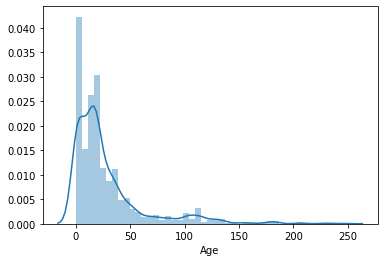

In [10]:
sns.distplot(df.Age)

Inference: Age feature consists of outilers and it mostly right skewed which needs to be handled

In [11]:
data=df.drop(['Age','Price'], axis=1)

<IPython.core.display.Javascript object>

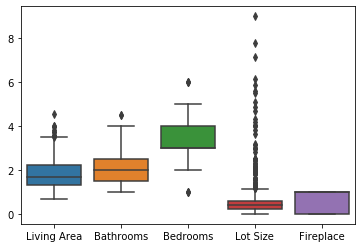

In [12]:
sns.boxplot(data=data, orient='v')

<IPython.core.display.Javascript object>

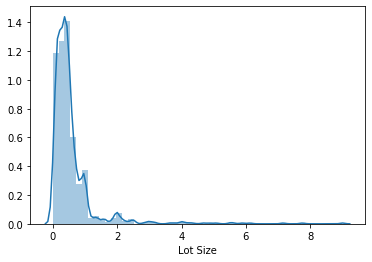

In [13]:
sns.distplot(df['Lot Size'])

<IPython.core.display.Javascript object>

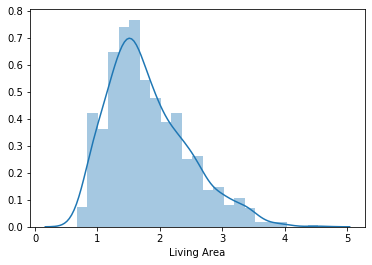

In [14]:
sns.distplot(df['Living Area'])

Inference: Lot Size and living area has outliers and mostly right skewed which needs to be handled

### Scaling features to handle outliers instead of using IQR or z score methods as there are only 1000+ obersvations to build best model

### Age, Lot Size and Living Area

In [15]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(np.log)

rows_to_be_transformed = ['Age', 'Lot Size', 'Living Area']
for row in rows_to_be_transformed:
    df[row+'_log']=ft.fit_transform(df[[row]])   

<IPython.core.display.Javascript object>

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:179: RuntimeWarning: divide by zero encountered in log
  return func(X, **(kw_args if kw_args else {}))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be

In [16]:
df.columns

Index(['Living Area', 'Bathrooms', 'Bedrooms', 'Lot Size', 'Age', 'Fireplace',
       'Price', 'Age_log', 'Lot Size_log', 'Living Area_log'],
      dtype='object')

In [17]:
df.rename(columns={'Lot Size_log':'LotSize_log'}, inplace=True)
df.rename(columns={'Living Area_log':'LivingArea_log'}, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

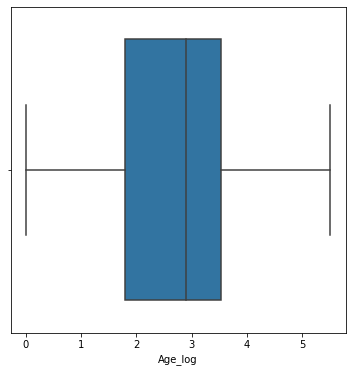

In [18]:
plt.subplots(figsize=(6,6))
sns.boxplot(df.Age_log, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

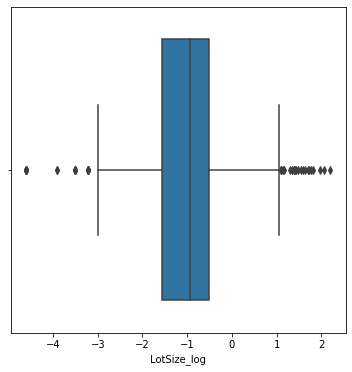

In [19]:
plt.subplots(figsize=(6,6))
sns.boxplot(df.LotSize_log, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

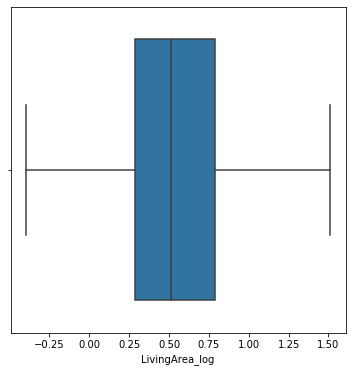

In [20]:
plt.subplots(figsize=(6,6))
sns.boxplot(df.LivingArea_log, orient='h')

Inference: Age and living area feature's outliers are handled but Lot size consists of outliers

### Replacing 'inf' values with Nan and dropping values

In [21]:
df.replace(-np.inf, np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

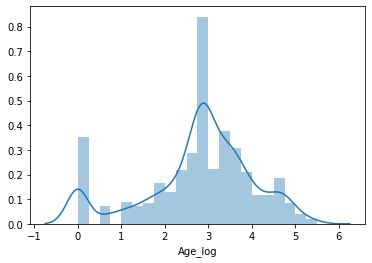

In [22]:
sns.distplot(df.Age_log)

Inference: Age_log feature doesn't contain outliers but graph is not normal. Model can be built and then its wise to mtake a decision on this feature

<IPython.core.display.Javascript object>

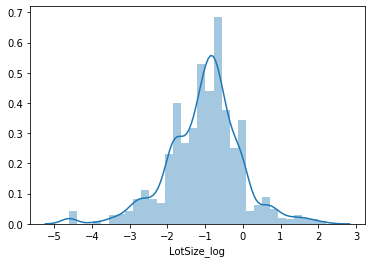

In [23]:
sns.distplot(df.LotSize_log)

Inference: Lot Size still consists of outliers but almost equal to normal graph. Model can be built and then its wise to mtake a decision on this feature

<IPython.core.display.Javascript object>

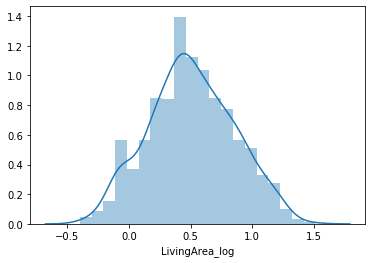

In [24]:
sns.distplot(df.LivingArea_log)

Inference: Living area does not consists of outliers and almost equal to normal graph. Model can be built and then its wise to mtake a decision on this feature

<IPython.core.display.Javascript object>

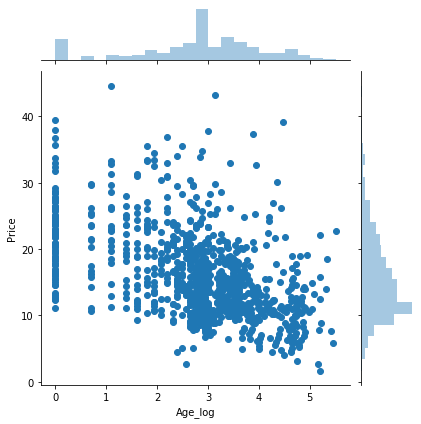

In [25]:
sns.jointplot(df.Age_log, df.Price)

Inference: Varied price range can be observed for less aged houses but price ranges are little low for aged houses.

<IPython.core.display.Javascript object>

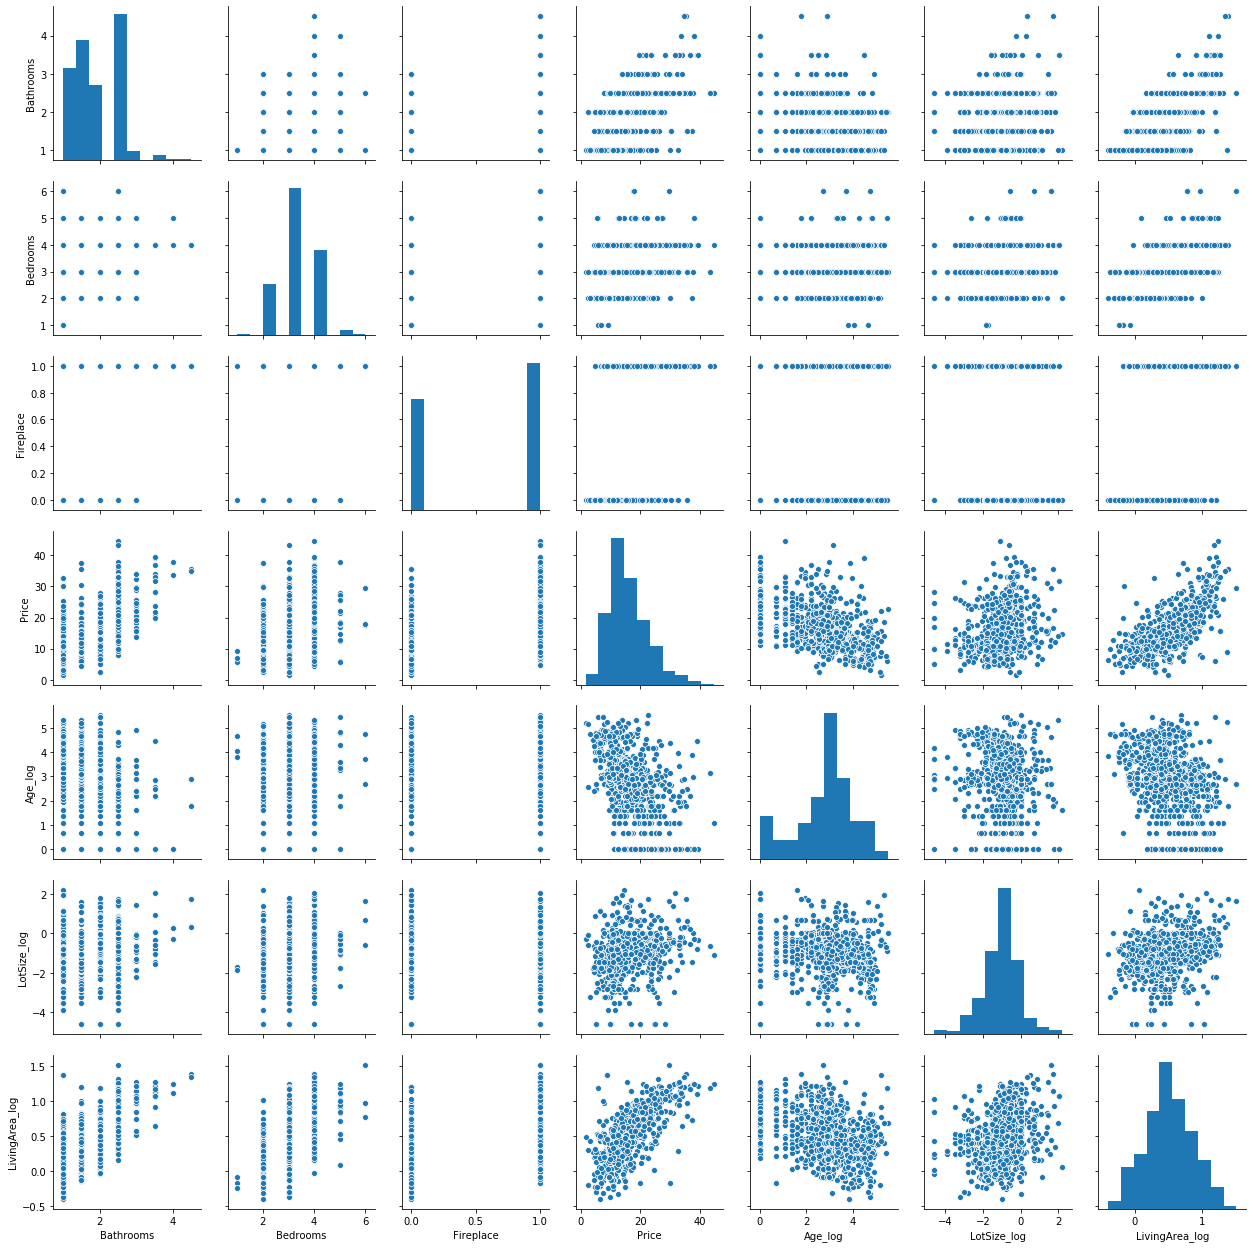

In [26]:
data=df.drop(['Age','Lot Size','Living Area'], axis=1)
g=sns.pairplot(data=data)

Inference: Price Appears to have linear relationship with living log and inversly related with Age

<IPython.core.display.Javascript object>

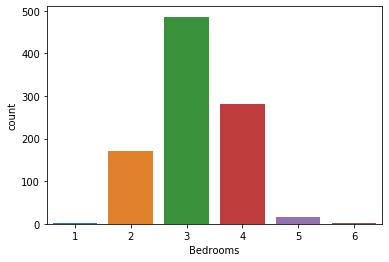

In [27]:
sns.countplot(df.Bedrooms)

Inference: There are maximum number of 3 bedroom houses

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, 'not exists'), Text(0, 0, 'exits')]

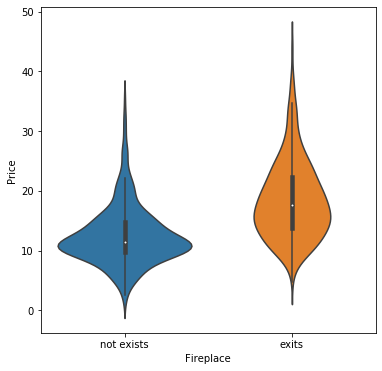

In [28]:
fig, a1=plt.subplots(1,1, figsize=(6,6))
labels=['not exists','exits']
sns.violinplot(df.Fireplace, df.Price)
a1.set_xticks(np.array([0,1]))
a1.set_xticklabels(labels)

Inference: House price is lesser for houses without fireplace when compared to those which have

<IPython.core.display.Javascript object>

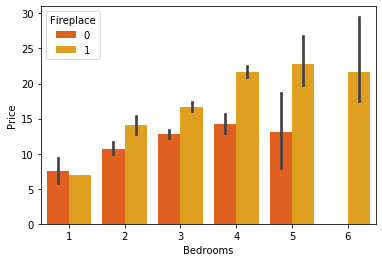

In [29]:
sns.barplot(df.Bedrooms, df.Price, hue=df.Fireplace, palette='autumn')

Inference:Single bedroom with/without fireplace costs the same but as the number of bedrooms increases, with fireplace costs more than without.

<IPython.core.display.Javascript object>

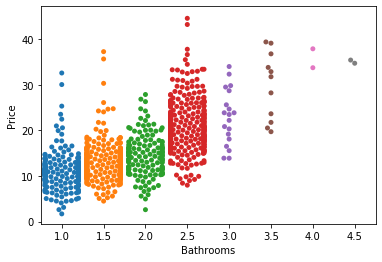

In [30]:
sns.swarmplot(df.Bathrooms, df.Price)

Inference: Houses with lesser number of bathrooms have less price. But the range of price spread is greater with 1.5 to 2.5 bathrooms.

# Cleaned Dataset ready for prediction

In [31]:
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price,Age_log,LotSize_log,LivingArea_log
0,1.982,1.0,3,2.00,133,0,14.2212,4.890349,0.693147,0.684106
1,1.676,1.5,3,0.38,14,1,13.4865,2.639057,-0.967584,0.516410
2,1.694,2.0,3,0.96,15,1,11.8007,2.708050,-0.040822,0.527093
3,1.800,1.0,2,0.48,49,1,13.8297,3.891820,-0.733969,0.587787
4,2.088,1.0,3,1.84,29,1,12.9470,3.367296,0.609766,0.736207


In [32]:
df.shape

(961, 10)

In [33]:
df.isnull().sum()

Living Area       0
Bathrooms         0
Bedrooms          0
Lot Size          0
Age               0
Fireplace         0
Price             0
Age_log           0
LotSize_log       0
LivingArea_log    0
dtype: int64

## Dataset with transfomed features which helps to predict good model

In [34]:
df.drop(['Age','Lot Size','Living Area'], axis=1, inplace= True)

In [35]:
df.head()

,Bathrooms,Bedrooms,Fireplace,Price,Age_log,LotSize_log,LivingArea_log
0,1.0,3,0,14.2212,4.890349,0.693147,0.684106
1,1.5,3,1,13.4865,2.639057,-0.967584,0.516410
2,2.0,3,1,11.8007,2.708050,-0.040822,0.527093
3,1.0,2,1,13.8297,3.891820,-0.733969,0.587787
4,1.0,3,1,12.9470,3.367296,0.609766,0.736207


# Initial LR model

In [36]:
x=df.drop(['Price'], axis=1)
y=df['Price']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=.3, random_state=1 )

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print("coefficients are ",lr.coef_,"intercept is ", lr.intercept_)
print()
print('r2 score for training data: ',r2_score(y_train, lr.predict(X_train)))
print('r2 score for testing data: ',r2_score(y_test, lr.predict(X_test)))
print('rmse score: ',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

coefficients are  [ 1.65140663 -0.71687653  0.93117688 -0.81629772  0.49410302 11.39173061] intercept is  11.703734880267548

r2 score for training data:  0.6141191224014859
r2 score for testing data:  0.5398204529355106


<IPython.core.display.Javascript object>

rmse score:  4.214144764845494


##### Inference: Cost function seems high and tunning of the model is necessary to get a better r2 score. Model seems overfitting

# OLS Model pearson correlation values for features

In [39]:
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     238.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          6.66e-186
Time:                        13:22:03   Log-Likelihood:                -2736.4
No. Observations:                 961   AIC:                             5487.
Df Residuals:                     954   BIC:                             5521.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.4138      0.933     11.161      0.000       8.583      12.245
Bathrooms          1.9722      0.337      5.855      0.000       1.311       2.633
Bedrooms          -0.3934      0.245     -1.606      0.109      -0.874       0.087
Fireplace          1.0657      0.318      3.351      0.001       0.442       1.690
Age_log           -0.7658      0.130     -5.897      0.000      -1.021      -0.511
LotSize_log        0.3393      0.148      2.294      0.022       0.049       0.630
LivingArea_log     9.7629      0.700     13.938      0.000       8.388      11.138
==============================================================================
Omnibus:                      232.933   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.098
Skew:                           1.143   Prob(JB):                    1.50e-175
Kurtosis:                       6.857   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Observation: JB value is higher and Bedrooms p-value is more than level of significance. Target is lightly skewed with peakedness. Features needs to be tuned to build better model

# Checking for assumptions:

### 1. No auto correlation 

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


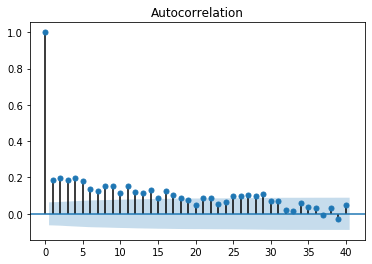

In [40]:
import statsmodels.tsa.api as smt
pattern=smt.graphics.plot_acf(model.resid, lags=40)
pattern.show()

Inference: pattern is neither cyclic nor alternative. DB constant is about 1.62 which exhibits a min correlation between residuals

### 2. Normality of residuals

<IPython.core.display.Javascript object>

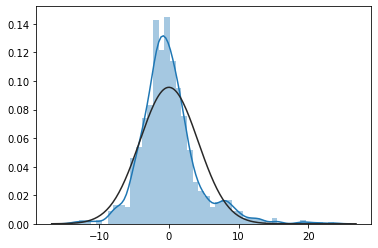

In [41]:
from scipy.stats import norm
sns.distplot(model.resid, fit=norm)

In [42]:
import scipy.stats as st
st.jarque_bera(model.resid)

(805.0982646530802, 0.0)

Inference: p-value should be greater than .05 but the value shows 0.0, therefore feature scaling is necessary

In [43]:
x=df.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))

In [44]:
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     253.3
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          1.78e-193
Time:                        13:22:21   Log-Likelihood:                 131.74
No. Observations:                 961   AIC:                            -249.5
Df Residuals:                     954   BIC:                            -215.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2708      0.025     89.395      0.000       2.221       2.321
Bathrooms          0.0238      0.004      5.667      0.000       0.016       0.032
Bedrooms          -0.0007      0.002     -0.375      0.708      -0.004       0.003
Fireplace          0.1018      0.016      6.526      0.000       0.071       0.132
Age_log           -0.0096      0.001     -7.524      0.000      -0.012      -0.007
LotSize_log       -0.0046      0.002     -1.917      0.056      -0.009       0.000
LivingArea_log     0.4125      0.029     14.138      0.000       0.355       0.470
==============================================================================
Omnibus:                       83.112   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.000
Skew:                           0.182   Prob(JB):                     6.28e-92
Kurtosis:                       6.218   Cond. No.                         71.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
st.jarque_bera(model.resid)

(420.0001886334209, 0.0)

Inference: Residuals are not following normality. Hence the assumption is not satisfied

### 3. Linearity in residuals

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'y prediction')

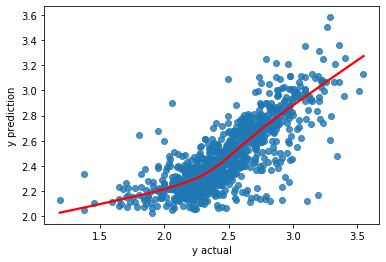

In [46]:
sns.regplot(x=y, y=model.predict(), lowess=True, line_kws={'color':'red'})
plt.xlabel('y actual')
plt.ylabel('y prediction')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

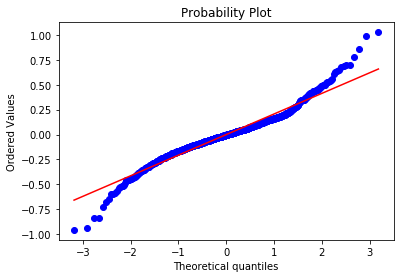

In [47]:
st.probplot(model.resid, plot=plt)
plt.show()

In [48]:
sm.stats.linear_rainbow(res=model)

(0.7359100406054138, 0.9995840096183457)

Inference: As p-value> .05, the residuals appears to be linear

### 4. Homoscedacity of residuals

<IPython.core.display.Javascript object>

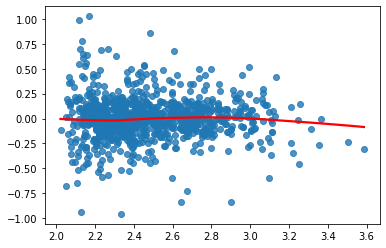

In [49]:
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color':'red'})

In [50]:
import statsmodels.stats.api as stt
stt.het_goldfeldquandt(model.resid, model.model.exog)

(0.7335209249929355, 0.999614515278369, 'increasing')

Inference: As p-value is greater than .05, residuals are homoscedasctic in nature

### 5. Multicolinearity between features

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
v=pd.DataFrame({'vif':vif[:]}, index=x.columns)

<IPython.core.display.Javascript object>

In [52]:
v.T

,Bathrooms,Bedrooms,Fireplace,Age_log,LotSize_log,LivingArea_log
vif,6.402731,8.349325,2.846208,2.961239,1.453339,4.97412


<IPython.core.display.Javascript object>

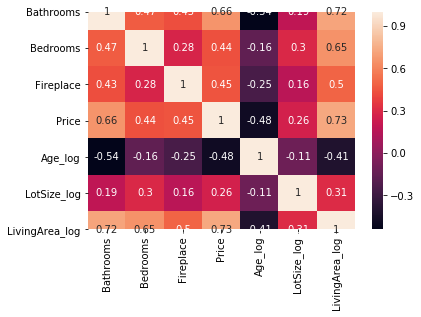

In [53]:
sns.heatmap(df.corr(), annot=True)

Inference: VIF seems low for all variables and only correlation exists between living area with bathrooms and bedrooms which will be handled

# Models

## Recursive method of elimination

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
no_of_features=np.arange(1,7)
highscore=0
score_list=[]
x=df.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))
for i in range(len(no_of_features)):
    X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=1)
    model=LinearRegression()
    rfe=RFE(model, no_of_features[i])
    X_rfe_train=rfe.fit_transform(X_train,y_train)
    X_rfe_test=rfe.transform(X_test)
    model.fit(X_rfe_train,y_train)
    score=model.score(X_rfe_test,y_test)
    print(score, end=' ')
    score_list.append(score)
    if score>highscore:
        highscore=score
        nof=no_of_features[i]
print()        
print("Optimum number of feature to be selected is ", nof, " and its r2 is ",highscore)

0.5339348376646702 0.5349117636933546 0.5658180511168392 0.5939527593979487 0.5948234257695105 0.5939195999135369 
Optimum number of feature to be selected is  5  and its r2 is  0.5948234257695105


##### Inference: The r2 score is with 59% accuracy. recursiveve method of elimination cannot be considered

# VIF

In [55]:
thres=5.0
op=pd.DataFrame()
x=df.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))
k=len(x.columns)
vif=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
for j in range(1,k+1):
    print('iteration num ',j)
    print(vif)
    a=np.argmax(vif)
    print("the variable number is", a)
    if vif[a]<=thres:
        break
    elif j==1:
        op=x.drop(x.columns[a], axis=1)
        vif=[variance_inflation_factor(op.values,i) for i in range(op.shape[1])]
    elif j>1:
        op=op.drop(op.columns[a], axis=1)
        vif=[variance_inflation_factor(op.values,i) for i in range(op.shape[1])]       
op

<IPython.core.display.Javascript object>

iteration num  1
[6.402730784266953, 8.349325292688096, 2.8462083803741782, 2.9612386802735826, 1.4533385657151363, 4.974119836216696]
the variable number is 1
iteration num  2
[5.382225823336152, 2.8124593287809856, 1.7329991312343203, 1.4487547797731948, 4.158756530517399]
the variable number is 0
iteration num  3
[2.4627619052525533, 1.6988949978321486, 1.3767875394548155, 2.1637896696839167]
the variable number is 0


,Fireplace,Age_log,LotSize_log,LivingArea_log
0,0,23.915515,0.480453,0.468002
1,1,6.964624,0.936219,0.266679
2,1,7.333536,0.001666,0.277827
3,1,15.146265,0.538711,0.345493
4,1,11.338681,0.371814,0.542000
...,...,...,...,...
1042,1,16.203456,0.000928,0.346800
1043,1,0.000000,0.839589,1.381247
1044,1,17.553207,0.244329,0.132965
1045,1,1.206949,0.000000,0.501315


In [56]:
x=df.drop(['Price','Bedrooms','Bathrooms'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=1 )
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print("coefficients are ",lr.coef_,"intercept is ", lr.intercept_)
print()
print('r2 score of train is: ',r2_score(y_train, lr.predict(X_train)))
print('r2 score of test is: ',r2_score(y_test, lr.predict(X_test)))
print('rmse score: ',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

coefficients are  [ 0.12471919 -0.01243502 -0.0052044   0.49071926] intercept is  2.343848539529918

r2 score of train is:  0.6036070813580302
r2 score of test is:  0.5853082467390088
rmse score:  0.21588184691624987


##### Inference: The rmse score has been reduced. VIF method of elimination can be considered .

## Linear Regression model with Backward elimination methodoloy

In [131]:
x=df.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))


import statsmodels.api as sm
cols=list(x.columns)
pmax=1
while(len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:], index=cols)
    pmax=max(p)
    feature_of_pmax=p.idxmax()
    if (pmax>.05):
        cols.remove(feature_of_pmax)
    else:
        break;
selected_feature_BE=cols
print(selected_feature_BE)

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['Bathrooms', 'Fireplace', 'Age_log', 'LivingArea_log']


In [132]:
####As per backward elimination, Bedrooms and LotSize_log features are ommitted

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
x=df.drop(['Price','LotSize_log','Bedrooms'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=1 )
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print("coefficients are ",lr.coef_,"intercept is ", lr.intercept_)
print()
print('r2 score for training data: ',r2_score(y_train, lr.predict(X_train)))
print('r2 score for testing data: ',r2_score(y_test, lr.predict(X_test)))
print('rmse score: ',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

coefficients are  [ 0.02498225  0.10966922 -0.00991005  0.40940496] intercept is  2.252714060888794

r2 score for training data:  0.6158276808263901
r2 score for testing data:  0.5939527593979487
rmse score:  0.2125280296353837


In [155]:
#Storing predicted values and efficiency

In [156]:
LR=lr.predict(X_test)
lr_r2_train=r2_score(y_train, lr.predict(X_train))
lr_r2_test=r2_score(y_test, lr.predict(X_test))
lr_rmse=np.sqrt(mean_squared_error(lr.predict(X_test), y_test))

##### Inference: The RMSE rate has been reduced but the model has 60% accuracy

# Ridge and Lasso with Grid Search Cross validation

### Ridge

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV, Lasso,LassoCV
x=df.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=1 )
alpha=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,50,100]
ridge=Ridge()
parameters={'alpha':alpha}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [158]:
r_rmse=np.sqrt(mean_squared_error(ridge_regressor.predict(X_test), y_test))
print(ridge_regressor.best_params_, "and RMSE:", r_rmse)
print("r2 score train: ",r2_score(y_train, ridge_regressor.predict(X_train)), 
                                  "r2 score test: ",r2_score(y_test, ridge_regressor.predict(X_test)))

{'alpha': 1} and RMSE: 0.20724398357746718
r2 score train:  0.6174916416286973 r2 score test:  0.593991560064121


In [159]:
ridge_regressor.best_index_

6

In [160]:
#Storing predicted values

In [161]:
RR=ridge_regressor.predict(X_test)
rr_r2_train=r2_score(y_train, ridge_regressor.predict(X_train))
rr_r2_test=r2_score(y_test, ridge_regressor.predict(X_test))
rr_rmse=np.sqrt(mean_squared_error(ridge_regressor.predict(X_test), y_test))

### Lasso 

In [162]:
alpha=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,50,100]
lasso=Lasso()
x=df.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=df['Price'].transform(lambda x: x**(1/3))
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=1 )
parameters={'alpha':alpha}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [163]:
lasso_regressor.best_index_

3

In [164]:
l_rmse=np.sqrt(mean_squared_error(lasso_regressor.predict(X_test), y_test))
print(lasso_regressor.best_params_, "and RMSE:", l_rmse)
print("r2 score train: ",r2_score(y_train, lasso_regressor.predict(X_train)), 
                                  "r2 score test: ",r2_score(y_test, lasso_regressor.predict(X_test)))

{'alpha': 0.0001} and RMSE: 0.20723548521881513
r2 score train:  0.6175293396803053 r2 score test:  0.5940248573838712


In [165]:
#Storing predicted values

In [166]:
LL=lasso_regressor.predict(X_test)
ll_r2_train=r2_score(y_train, lasso_regressor.predict(X_train))
ll_r2_test=r2_score(y_test, lasso_regressor.predict(X_test))
ll_rmse=np.sqrt(mean_squared_error(lasso_regressor.predict(X_test), y_test))

# Final predictions with LR, Ridge and Lasso models

In [167]:
actual=y_test.values
FinalDF=pd.DataFrame(actual, columns=['Actual'])
FinalDF['LR prediction']=LR
FinalDF['Ridge prediction']=RR
FinalDF['Lasso Prediction']=LL

<IPython.core.display.Javascript object>

In [168]:
FinalDF

,Actual,LR prediction,Ridge prediction,Lasso Prediction
0,3.396542,2.964784,2.974009,2.974494
1,2.929466,2.930009,2.921290,2.923061
2,2.370560,2.372127,2.368239,2.368260
3,2.145710,2.405337,2.381769,2.381223
4,2.460659,2.172699,2.161546,2.161452
...,...,...,...,...
188,2.661347,2.618975,2.627646,2.625723
189,2.405652,2.738277,2.753727,2.754782
190,2.269296,2.287462,2.287900,2.286380
191,2.522836,2.482974,2.495644,2.494412


<IPython.core.display.Javascript object>

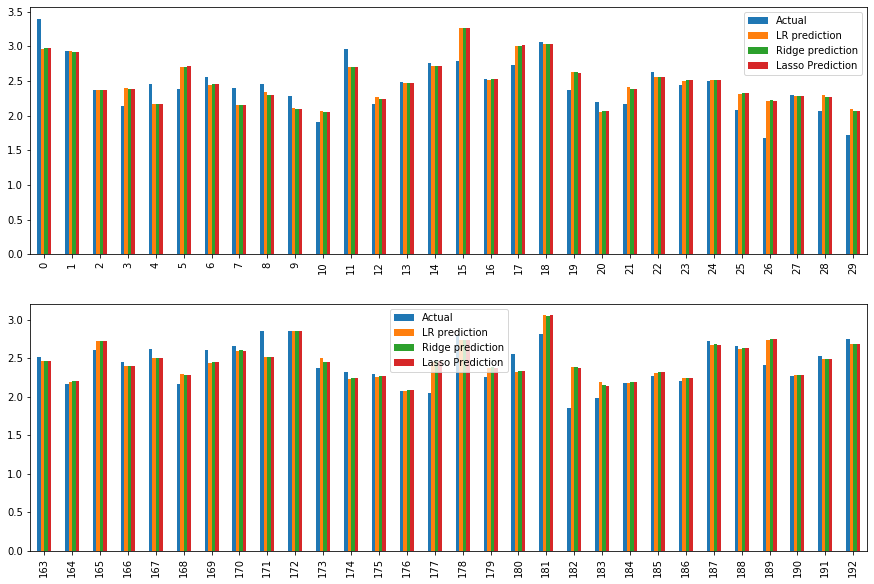

In [169]:
fig, ax = plt.subplots(2,1 , figsize=(15,10))
price_head=FinalDF.head(30)
price_head.plot(kind='bar', ax=ax[0])
price_tail=FinalDF.tail(30)
price_tail.plot(kind='bar', ax=ax[1])

#### Inference: 60% of accuracy can be obtained from all the three models with 0.21 RMSE value 

# Final scores of different models applied

In [170]:
r2_train=[lr_r2_train,ll_r2_train,rr_r2_train]
r2_test=[lr_r2_test,ll_r2_test,rr_r2_test]
rmse=[lr_rmse,ll_rmse,rr_rmse]

In [171]:
FinalScores=pd.DataFrame(r2_train, columns=['r2 train'], index=['LR','Lasso','Ridge'])
FinalScores['r2 test']=r2_test
FinalScores['RMSE']=rmse

<IPython.core.display.Javascript object>

In [172]:
FinalScores

,r2 train,r2 test,RMSE
LR,0.615828,0.593953,0.207254
Lasso,0.617529,0.594025,0.207235
Ridge,0.617492,0.593992,0.207244
